In [1]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# 6th analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q12A', 'Q12B', 'Q12C', 'Q12D']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Contact local government councillor', 'Contact MP', 'Contact political party official', 'Contact traditional leader']

df_new.head()

,State,Contact local government councillor,Contact MP,Contact political party official,Contact traditional leader
0,IMO,Never,Never,Never,Never
1,FCT ABUJA,Never,Never,A few times,A few times
2,FCT ABUJA,A few times,Never,Don’t know,Never
3,FCT ABUJA,Never,Never,Never,Never
4,FCT ABUJA,Never,Never,Never,Never


In [13]:
df_new['Contact local government councillor'].value_counts(normalize=True)

Never          0.759670
Only once      0.115409
A few times    0.097654
Often          0.027267
Name: Contact local government councillor, dtype: float64

In [14]:
df_new['Contact MP'].value_counts(normalize=True)

Never          0.856056
Only once      0.071655
A few times    0.057070
Often          0.015219
Name: Contact MP, dtype: float64

In [15]:
df_new['Contact political party official'].value_counts(normalize=True)

Never          0.730501
Only once      0.134432
A few times    0.109702
Often          0.025365
Name: Contact political party official, dtype: float64

In [16]:
df_new['Contact traditional leader'].value_counts(normalize=True)

Never          0.558656
A few times    0.201015
Only once      0.147749
Often          0.092581
Name: Contact traditional leader, dtype: float64

In [12]:
hope = ["Don't know","Refused","Don’t know"]
less = ['Contact local government councillor', 'Contact MP', 'Contact political party official', 'Contact traditional leader']

for j in less:
    for i in hope:
        df_new = df_new.loc[df_new[j] != i]

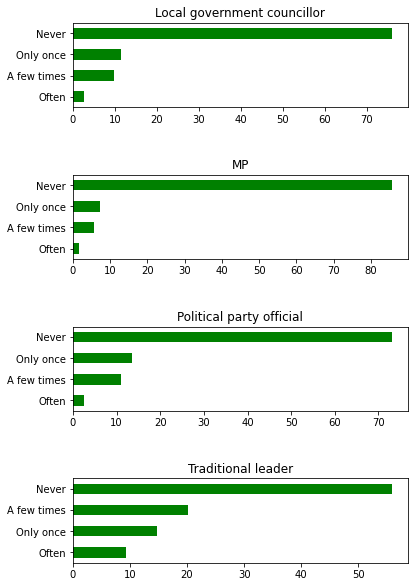

In [19]:
fig = plt.figure()

# Needed to add spacing between 1st and 2nd row
# Add a margin between the main title and sub-plots
fig.subplots_adjust(hspace=0.8, top=2)

# Add the main title
#fig.suptitle("Officials respondents contact", fontsize=15)


# Add the subplots
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)


# Plot for axis 1-4
(df_new['Contact local government councillor'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax1, color='green')
(df_new['Contact MP'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax2, color='green')
(df_new['Contact political party official'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax3, color='green')
(df_new['Contact traditional leader'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax4, color='green')

# Add the text for each subplot
ax1.title.set_text("Local government councillor")
ax2.title.set_text("MP")
ax3.title.set_text("Political party official")
ax4.title.set_text('Traditional leader')

plt.show()